In [1]:
# Checking created ELM Data 

import xarray as xr
import glob
import matplotlib.pyplot as plt

In [43]:
path_in_ELM_new = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_Met_Data_processed/1x1pt_US-DUK/"
fname = f"{path_in_ELM_new}/all_hourly1996_2012.nc"
ds = xr.open_dataset(fname)
ds

<xarray.Dataset>
Dimensions:     (gridcell: 1, time: 297840, scalar: 1)
Coordinates:
  * time        (time) object 1996-01-01 00:15:00 ... 2012-12-31 23:44:59.998378
Dimensions without coordinates: gridcell, scalar
Data variables:
    TBOT        (gridcell, time) float32 ...
    RH          (gridcell, time) float32 ...
    WIND        (gridcell, time) float32 ...
    PSRF        (gridcell, time) float32 ...
    FSDS        (gridcell, time) float32 ...
    PRECTmms    (gridcell, time) float32 ...
    FLDS        (gridcell, time) float32 ...
    ZBOT        (gridcell, time) float32 ...
    LONGXY      (gridcell) float64 ...
    LATIXY      (gridcell) float64 ...
    start_year  (scalar) int32 ...
    end_year    (scalar) int32 ...
Attributes:
    history:  Fri Sep 29 16:46:25 2023: ncpdq /Users/ud4/Documents/FACEMDS/ME...
    NCO:      netCDF Operators version 5.1.7 (Homepage = http://nco.sf.net, C...

In [14]:
path_in = "/Users/ud4/Documents/FACEMDS/MET_Data_Processing/ELM_Data/data/atm/datm7/CLM1PT_data/1x1pt_US-DUK/"
fname_ELMDuke = fname = f"{path_in}"
ds_elm_all= xr.open_mfdataset(glob.glob(f"{fname_ELMDuke}*.nc"))
ds_elm_all
print(ds_elm_all)

<xarray.Dataset>
Dimensions:   (time: 210240, lat: 1, lon: 1, scalar: 1)
Coordinates:
  * time      (time) object 1996-01-01 00:00:00 ... 2007-12-31 23:30:00
Dimensions without coordinates: lat, lon, scalar
Data variables: (12/14)
    LONGXY    (time, lat, lon) float64 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    LATIXY    (time, lat, lon) float64 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    ZBOT      (time, lat, lon) float64 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    EDGEW     (time, scalar) float64 dask.array<chunksize=(1488, 1), meta=np.ndarray>
    EDGEE     (time, scalar) float64 dask.array<chunksize=(1488, 1), meta=np.ndarray>
    EDGES     (time, scalar) float64 dask.array<chunksize=(1488, 1), meta=np.ndarray>
    ...        ...
    RH        (time, lat, lon) float64 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    WIND      (time, lat, lon) float64 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    FSDS      (time, lat, lon) float6

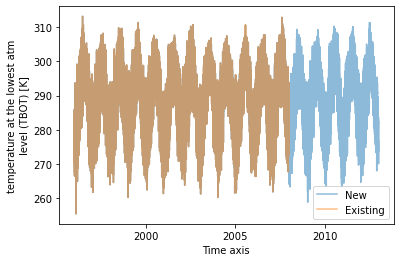

In [4]:
ds.TBOT.plot(alpha=.5,label='New')
ds_elm_all.TBOT.plot(alpha=.5,label='Existing')
plt.legend()

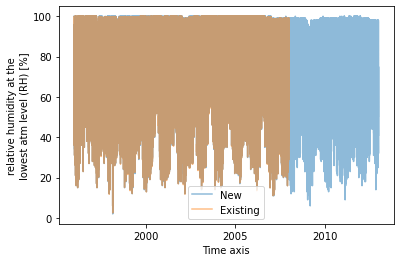

In [5]:
ds.RH.plot(alpha=.5,label='New')
ds_elm_all.RH.plot(alpha=.5,label='Existing')
plt.legend()

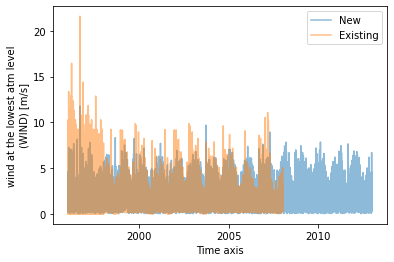

In [6]:
ds.WIND.plot(alpha=.5,label='New')
ds_elm_all.WIND.plot(alpha=.5,label='Existing')
plt.legend()

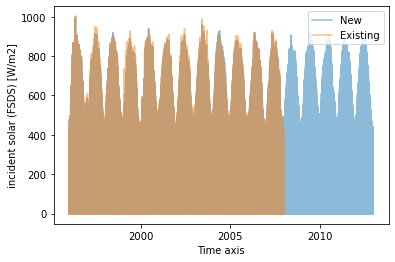

In [7]:
ds.FSDS.plot(alpha=.5,label='New')
ds_elm_all.FSDS.plot(alpha=.5,label='Existing')
plt.legend()

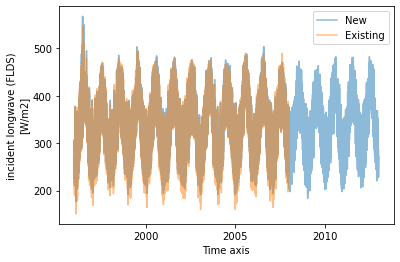

In [8]:
ds.FLDS.plot(alpha=.5,label='New')
ds_elm_all.FLDS.plot(alpha=.5,label='Existing')
plt.legend()

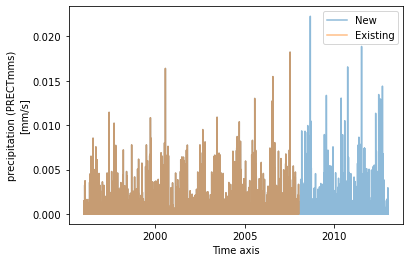

In [9]:
ds.PRECTmms.plot(alpha=.5,label='New')
ds_elm_all.PRECTmms.plot(alpha=.5,label='Existing')
plt.legend()

# Saving Monthly Files

In [46]:
day_month = {}
day_month[1] = 31
day_month[2] = 28
day_month[3] = 31
day_month[4] = 30
day_month[5] = 31
day_month[6] = 30
day_month[7] = 31
day_month[8] = 31
day_month[9] = 30
day_month[10] = 31
day_month[11] = 30
day_month[12] = 31

# Save datasets for each month
for year in range(1996, 2013):  # Loop through 10 years
    for month in range(1, 13):  # Loop through 12 months
        start_date = f"{year}-{month:02d}-01"
        end_date = f"{year}-{month:02d}-{day_month[month]}" #if month != 12 else f"{year+1}-01-01"
        #print(start_date,end_date)
        # Select data for the current month
        ds_month = ds.sel(time=slice(start_date, end_date))
        
        # Save the dataset to a file (adjust the file naming as needed)
        file_name = f"{path_in_ELM_new}monthly/{year}-{month:02d}.nc"
        ds_month.to_netcdf(file_name)
        print(f"Saved {file_name}")

print("All datasets saved.")


/var/folders/f1/01gxw8vn74q_x_rf_p5ztryjr405zq/T/ipykernel_35897/148877017.py:26: SerializationWarning: saving variable TBOT with floating point data as an integer dtype without any _FillValue to use for NaNs
  ds_month.to_netcdf(file_name)
/var/folders/f1/01gxw8vn74q_x_rf_p5ztryjr405zq/T/ipykernel_35897/148877017.py:26: SerializationWarning: saving variable RH with floating point data as an integer dtype without any _FillValue to use for NaNs
  ds_month.to_netcdf(file_name)
/var/folders/f1/01gxw8vn74q_x_rf_p5ztryjr405zq/T/ipykernel_35897/148877017.py:26: SerializationWarning: saving variable WIND with floating point data as an integer dtype without any _FillValue to use for NaNs
  ds_month.to_netcdf(file_name)
/var/folders/f1/01gxw8vn74q_x_rf_p5ztryjr405zq/T/ipykernel_35897/148877017.py:26: SerializationWarning: saving variable PSRF with floating point data as an integer dtype without any _FillValue to use for NaNs
  ds_month.to_netcdf(file_name)
/var/folders/f1/01gxw8vn74q_x_rf_p5ztr

Saved /Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_Met_Data_processed/1x1pt_US-DUK/1996-01.nc
Saved /Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_Met_Data_processed/1x1pt_US-DUK/1996-02.nc
Saved /Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_Met_Data_processed/1x1pt_US-DUK/1996-03.nc
Saved /Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_Met_Data_processed/1x1pt_US-DUK/1996-04.nc
Saved /Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_Met_Data_processed/1x1pt_US-DUK/1996-05.nc
Saved /Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_Met_Data_processed/1x1pt_US-DUK/1996-06.nc
Saved /Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_Met_Data_processed/1x1pt_US-DUK/1996-07.nc
Saved /Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_Met_Data_processed/1x1pt_US-DUK/1996-08.nc
Saved /Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_Met_Data_processed/1x1pt_US-DUK/1996-09.nc
Saved /Users/ud4/Documents/F

In [44]:
path_in_ELM_new

'/Users/ud4/Documents/FACEMDS/MET_Data_Processing/Oren_2022_Met_Data_processed/1x1pt_US-DUK/'

In [36]:
day_month[2]

28